In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

pd.set_option('display.max_columns', None)

# Combining Udemy and Edx courses for modeling

In [2]:
udemy=pd.read_csv('data/cleaned_data.csv')
udemy.head()

,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,rating,number_of_ratings,update_date,number_of_students,time_since_creation
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Finance & Accounting,3.6,114.0,2/2017,2612.0,7
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Finance & Accounting,3.7,1436.0,7/2017,4292.0,7
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Finance & Accounting,4.6,1636.0,5/2024,12820.0,8
3,Beginner to Pro - Excel Tutorial,https://www.udemy.com/complete-excel-finance-c...,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Finance & Accounting,4.0,551.0,8/2020,17498.0,7
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Finance & Accounting,4.7,200.0,11/2022,21164.0,8


In [3]:
edx=pd.read_csv('data/cleaned_edx.csv')
edx.head()

,course_url,course_level,course_enrollments,subject,title,rating,number_of_ratings,number_of_students,price,total_length
0,https://www.edx.org/course/the-architectural-i...,Beginner Level,415051.0,Architecture,HarvardX: The Architectural Imagination,4.700000,51.000000,565890,249.0,50.0
1,https://www.edx.org/course/the-path-to-happiness,Beginner Level,29623.0,Social Sciences,HarvardX: The Path to Happiness: What Chinese ...,4.700000,30.000000,130686,149.0,26.0
2,https://www.edx.org/course/pyramids-of-giza-an...,Beginner Level,127414.0,Art & Culture,HarvardX: Pyramids of Giza: Ancient Egyptian A...,4.506679,21.236641,178825,219.0,32.0
3,https://www.edx.org/course/us-public-policy-so...,Beginner Level,46472.0,Social Sciences,"HarvardX: U.S. Public Policy: Social, Economic...",4.900000,36.000000,81922,149.0,16.0
4,https://www.edx.org/course/women-making-histor...,Beginner Level,40788.0,History,"HarvardX: Women Making History: Ten Objects, M...",5.000000,5.000000,68103,209.0,24.0


### First reorganize the datasets so that we can combine them

In [4]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         1925 non-null   object 
 1   url                  1925 non-null   object 
 2   price                1925 non-null   int64  
 3   num_subscribers      1925 non-null   int64  
 4   num_reviews          1925 non-null   int64  
 5   num_lectures         1925 non-null   int64  
 6   level                1925 non-null   object 
 7   content_duration     1925 non-null   float64
 8   published_timestamp  1925 non-null   object 
 9   subject              1925 non-null   object 
 10  rating               1925 non-null   float64
 11  number_of_ratings    1925 non-null   float64
 12  update_date          1925 non-null   object 
 13  number_of_students   1925 non-null   float64
 14  time_since_creation  1925 non-null   int64  
dtypes: float64(4), int64(5), object(6)
mem

In [5]:
#rename columns
udemy.rename(columns={'course_title':'title', 'url':'url', 'num_subscribers':'past_num_students', 'num_reviews':'past_num_ratings', 'num_lectures':'num_lectures', 'level':'level', 'content_duration':'total_length', 'published_timestamp':'published_date', 'subject':'subject', 'rating':'rating', 'number_of_ratings':'num_ratings', 'update_date':'update_date', 'number_of_students':'num_students', 'time_since_creation':'time_since_creation'}, inplace=True)
udemy.head(2)

,title,url,price,past_num_students,past_num_ratings,num_lectures,level,total_length,published_date,subject,rating,num_ratings,update_date,num_students,time_since_creation
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Finance & Accounting,3.6,114.0,2/2017,2612.0,7
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Finance & Accounting,3.7,1436.0,7/2017,4292.0,7


In [6]:
#reorder columns
order_list=['url', 'title', 'subject', 'level', 'total_length', 'rating', 'num_ratings', 'price', 'num_students', 'past_num_students', 'past_num_ratings', 'num_lectures', 'published_date', 'update_date', 'time_since_creation']
udemy = udemy.reindex(columns=order_list)
udemy.head(2)

,url,title,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,past_num_ratings,num_lectures,published_date,update_date,time_since_creation
0,https://www.udemy.com/ultimate-investment-bank...,Ultimate Investment Banking Course,Finance & Accounting,All Levels,1.5,3.6,114.0,200,2612.0,2147,23,51,2017-01-18T20:58:58Z,2/2017,7
1,https://www.udemy.com/goods-and-services-tax/,Complete GST Course & Certification - Grow You...,Finance & Accounting,All Levels,39.0,3.7,1436.0,75,4292.0,2792,923,274,2017-03-09T16:34:20Z,7/2017,7


In [7]:
#I'll have to drop some column to have the same features between the 2 datasets
to_drop=['past_num_ratings', 'num_lectures', 'published_date', 'update_date', 'time_since_creation']
udemy.drop(to_drop, axis=1, inplace=True)
udemy.shape

(1925, 10)

In [8]:
udemy['online_academy']='Udemy'
udemy.head(5)

,url,title,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
0,https://www.udemy.com/ultimate-investment-bank...,Ultimate Investment Banking Course,Finance & Accounting,All Levels,1.5,3.6,114.0,200,2612.0,2147,Udemy
1,https://www.udemy.com/goods-and-services-tax/,Complete GST Course & Certification - Grow You...,Finance & Accounting,All Levels,39.0,3.7,1436.0,75,4292.0,2792,Udemy
2,https://www.udemy.com/financial-modeling-for-b...,Financial Modeling for Business Analysts and C...,Finance & Accounting,Intermediate Level,2.5,4.6,1636.0,45,12820.0,2174,Udemy
3,https://www.udemy.com/complete-excel-finance-c...,Beginner to Pro - Excel Tutorial,Finance & Accounting,All Levels,3.0,4.0,551.0,95,17498.0,2451,Udemy
4,https://www.udemy.com/how-to-maximize-your-pro...,How To Maximize Your Profits Trading Options,Finance & Accounting,Intermediate Level,2.0,4.7,200.0,200,21164.0,1276,Udemy


In [9]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   course_url          1191 non-null   object 
 1   course_level        1191 non-null   object 
 2   course_enrollments  1191 non-null   float64
 3   subject             1191 non-null   object 
 4   title               1191 non-null   object 
 5   rating              1191 non-null   float64
 6   number_of_ratings   1191 non-null   float64
 7   number_of_students  1191 non-null   int64  
 8   price               1191 non-null   float64
 9   total_length        1191 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 93.2+ KB


In [10]:
#rename columns
edx.rename(columns={'course_url':'url', 'course_level':'level', 'course_enrollments':'past_num_students', 'subject':'subject', 'title':'title', 'rating':'rating', 'number_of_ratings':'num_ratings', 'number_of_students':'num_students', 'price':'price', 'total_length':'total_length'}, inplace=True)
edx.head(2)

,url,level,past_num_students,subject,title,rating,num_ratings,num_students,price,total_length
0,https://www.edx.org/course/the-architectural-i...,Beginner Level,415051.0,Architecture,HarvardX: The Architectural Imagination,4.7,51.0,565890,249.0,50.0
1,https://www.edx.org/course/the-path-to-happiness,Beginner Level,29623.0,Social Sciences,HarvardX: The Path to Happiness: What Chinese ...,4.7,30.0,130686,149.0,26.0


In [11]:
#reorder columns
order_list2=['url', 'title', 'subject', 'level', 'total_length', 'rating', 'num_ratings', 'price', 'num_students', 'past_num_students']
edx = edx.reindex(columns=order_list2)
edx.head(2)

,url,title,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students
0,https://www.edx.org/course/the-architectural-i...,HarvardX: The Architectural Imagination,Architecture,Beginner Level,50.0,4.7,51.0,249.0,565890,415051.0
1,https://www.edx.org/course/the-path-to-happiness,HarvardX: The Path to Happiness: What Chinese ...,Social Sciences,Beginner Level,26.0,4.7,30.0,149.0,130686,29623.0


In [12]:
edx['online_academy']='edX'
edx.head(2)

,url,title,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
0,https://www.edx.org/course/the-architectural-i...,HarvardX: The Architectural Imagination,Architecture,Beginner Level,50.0,4.7,51.0,249.0,565890,415051.0,edX
1,https://www.edx.org/course/the-path-to-happiness,HarvardX: The Path to Happiness: What Chinese ...,Social Sciences,Beginner Level,26.0,4.7,30.0,149.0,130686,29623.0,edX


In [13]:
print(udemy.shape)
edx.shape

(1925, 11)


(1191, 11)

In [14]:
all_data=pd.concat([udemy, edx], axis=0)
print(all_data.shape)
all_data

(3116, 11)


,url,title,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
0,https://www.udemy.com/ultimate-investment-bank...,Ultimate Investment Banking Course,Finance & Accounting,All Levels,1.5,3.600000,114.000000,200.0,2612.0,2147.000000,Udemy
1,https://www.udemy.com/goods-and-services-tax/,Complete GST Course & Certification - Grow You...,Finance & Accounting,All Levels,39.0,3.700000,1436.000000,75.0,4292.0,2792.000000,Udemy
2,https://www.udemy.com/financial-modeling-for-b...,Financial Modeling for Business Analysts and C...,Finance & Accounting,Intermediate Level,2.5,4.600000,1636.000000,45.0,12820.0,2174.000000,Udemy
3,https://www.udemy.com/complete-excel-finance-c...,Beginner to Pro - Excel Tutorial,Finance & Accounting,All Levels,3.0,4.000000,551.000000,95.0,17498.0,2451.000000,Udemy
4,https://www.udemy.com/how-to-maximize-your-pro...,How To Maximize Your Profits Trading Options,Finance & Accounting,Intermediate Level,2.0,4.700000,200.000000,200.0,21164.0,1276.000000,Udemy
...,...,...,...,...,...,...,...,...,...,...,...
1186,https://www.edx.org/course/estadistica-aplicad...,GalileoX: Estadística Aplicada a los Negocios,Development,Beginner Level,30.0,4.506679,21.236641,39.0,30848.0,25537.000000,edX
1187,https://www.edx.org/course/data-literacy-found...,RITx: Data Literacy Foundations,Development,Intermediate Level,32.0,4.506679,21.236641,249.0,7158.0,51943.173364,edX
1188,https://www.edx.org/course/data-processing-and...,RITx: Data Processing and Analysis with Excel,Development,Intermediate Level,32.0,3.100000,9.000000,249.0,36528.0,51943.173364,edX
1189,https://www.edx.org/course/data-representation...,RITx: Data Representation and Visualization in...,Development,Intermediate Level,32.0,4.506679,21.236641,249.0,15559.0,51943.173364,edX


In [15]:
#shuffling rows and resetting index
all_data = all_data.sample(frac = 1)
all_data.reset_index(drop=True, inplace=True)
all_data

,url,title,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
0,https://www.edx.org/course/knowledge-managemen...,HKPolyUx: Knowledge Management and Big Data in...,Business,Beginner Level,64.000000,4.3,6.0,209.0,74075.0,69550.0,edX
1,https://www.udemy.com/projects-in-css/,Projects in CSS,Development,All Levels,10.000000,4.5,308.0,60.0,5402.0,4689.0,Udemy
2,https://www.edx.org/course/becoming-an-effecti...,UQx: Becoming an Effective Leader,Business,Intermediate Level,100.000000,4.3,21.0,119.0,94863.0,58336.0,edX
3,https://www.udemy.com/learn-by-example-reactjs/,Learn by Example : ReactJS,Development,Beginner Level,7.500000,4.4,146.0,50.0,3011.0,1496.0,Udemy
4,https://www.udemy.com/playing-piano-i-play-cho...,Playing Piano: Play Chords and Popular Pieces ...,Music,Beginner Level,3.000000,4.5,15.0,100.0,3451.0,1987.0,Udemy
...,...,...,...,...,...,...,...,...,...,...,...
3111,https://www.udemy.com/how-to-draw-dogs/,How to Draw Majestic Animals: Dogs | Master Dr...,Design,All Levels,1.000000,4.4,37.0,35.0,1881.0,1524.0,Udemy
3112,https://www.udemy.com/create-autumn-leaf-brushes/,Create leaf brush set in Photoshop!,Design,Beginner Level,0.616667,5.0,2.0,20.0,31.0,4.0,Udemy
3113,https://www.udemy.com/how-to-fund-your-million...,"How to Fund your Business: Equity, Debt, Unfund",Finance & Accounting,Intermediate Level,6.000000,4.6,5.0,50.0,1157.0,1105.0,Udemy
3114,https://www.edx.org/course/project-management-...,DelftX: Project Management: Mastering Complexity,Business,Expert Level,30.000000,4.0,5.0,199.0,16572.0,11416.0,edX


In [16]:
#all_data.to_csv('udemy_and_edx_courses.csv', index=False)

# Looking at numerical and categorical variables' statistics - EDA

In [17]:
data=pd.read_csv('data/udemy_and_edx_courses.csv')
data

,url,title,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
0,https://www.udemy.com/drawing-and-sketching-fo...,How to Draw and Sketch for Absolute Beginners ...,Design,Beginner Level,9.0,4.700000,4999.000000,150.0,28090.0,1360.000000,Udemy
1,https://www.edx.org/course/inteligencia-emocio...,AnahuacX: Inteligencia emocional para el lider...,Social Sciences,Beginner Level,20.0,4.500000,20.000000,39.0,45793.0,15680.000000,edX
2,https://www.edx.org/course/entrepreneurship-in...,HarvardX: Entrepreneurship in Emerging Economies,Business,Beginner Level,30.0,4.700000,68.000000,249.0,825470.0,597683.000000,edX
3,https://www.udemy.com/hands-on-guitar-beyond-b...,Hands On Guitar: Beyond Beginner,Music,Beginner Level,3.0,4.800000,130.000000,20.0,8568.0,54.000000,Udemy
4,https://www.udemy.com/using-modern-javascript/,Using Modern JavaScript Today,Development,Intermediate Level,16.5,4.700000,232.000000,50.0,2277.0,1658.000000,Udemy
...,...,...,...,...,...,...,...,...,...,...,...
3111,https://www.udemy.com/finance-and-accounting-f...,The Complete Introduction To Accounting and Fi...,Finance & Accounting,All Levels,12.5,4.300000,2036.000000,50.0,14364.0,1175.000000,Udemy
3112,https://www.udemy.com/trumpet-a-beginners-guide/,Learn to Play the Trumpet: Beginner to Pro Mad...,Music,Beginner Level,7.5,4.900000,1607.000000,50.0,6423.0,966.000000,Udemy
3113,https://www.udemy.com/straight-from-business-s...,Straight From Business School: Create Financia...,Finance & Accounting,Beginner Level,1.0,4.000000,19.000000,20.0,96.0,31.000000,Udemy
3114,https://www.edx.org/course/favoriser-le-bien-e...,HECMontrealX: Favoriser le bien-être et l'effi...,Business,Beginner Level,15.0,4.506679,21.236641,249.0,5178.0,51943.173364,edX


In [18]:
#the columns url and title won't be useful for our model so i'll drop them
data.drop(['url', 'title'], axis=1, inplace=True)
data

,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
0,Design,Beginner Level,9.0,4.700000,4999.000000,150.0,28090.0,1360.000000,Udemy
1,Social Sciences,Beginner Level,20.0,4.500000,20.000000,39.0,45793.0,15680.000000,edX
2,Business,Beginner Level,30.0,4.700000,68.000000,249.0,825470.0,597683.000000,edX
3,Music,Beginner Level,3.0,4.800000,130.000000,20.0,8568.0,54.000000,Udemy
4,Development,Intermediate Level,16.5,4.700000,232.000000,50.0,2277.0,1658.000000,Udemy
...,...,...,...,...,...,...,...,...,...
3111,Finance & Accounting,All Levels,12.5,4.300000,2036.000000,50.0,14364.0,1175.000000,Udemy
3112,Music,Beginner Level,7.5,4.900000,1607.000000,50.0,6423.0,966.000000,Udemy
3113,Finance & Accounting,Beginner Level,1.0,4.000000,19.000000,20.0,96.0,31.000000,Udemy
3114,Business,Beginner Level,15.0,4.506679,21.236641,249.0,5178.0,51943.173364,edX


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116 entries, 0 to 3115
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject            3116 non-null   object 
 1   level              3116 non-null   object 
 2   total_length       3116 non-null   float64
 3   rating             3116 non-null   float64
 4   num_ratings        3116 non-null   float64
 5   price              3116 non-null   float64
 6   num_students       3116 non-null   float64
 7   past_num_students  3116 non-null   float64
 8   online_academy     3116 non-null   object 
dtypes: float64(6), object(3)
memory usage: 219.2+ KB


In [20]:
#separate num and cat
numerical_df = data.select_dtypes('number')
categorical_df = data.select_dtypes('object')

display(numerical_df.columns.values)
display(categorical_df.columns.values)

array(['total_length', 'rating', 'num_ratings', 'price', 'num_students',
       'past_num_students'], dtype=object)

array(['subject', 'level', 'online_academy'], dtype=object)

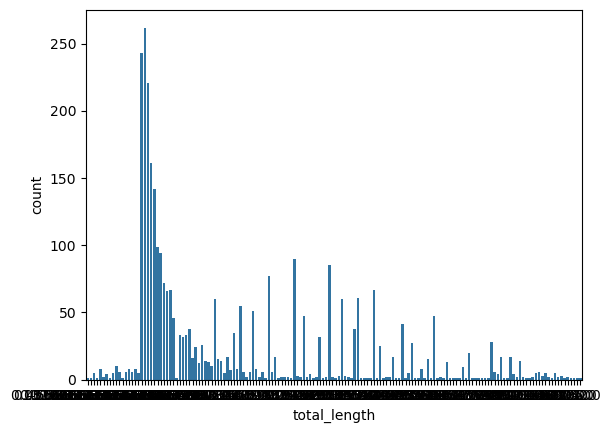

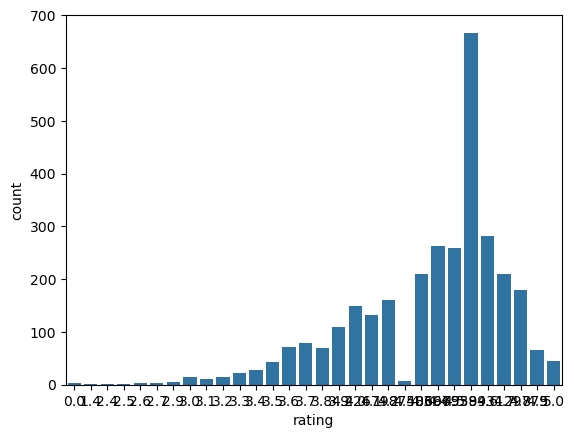

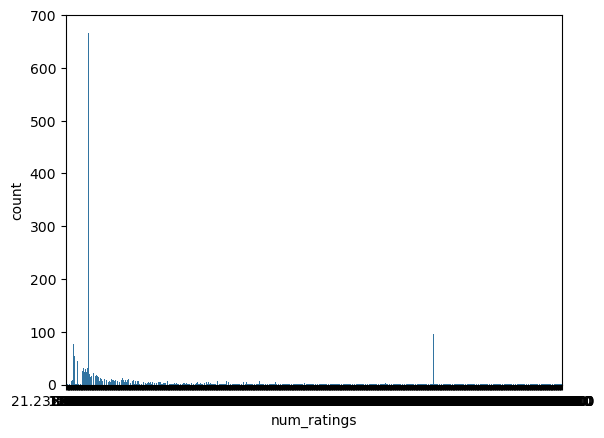

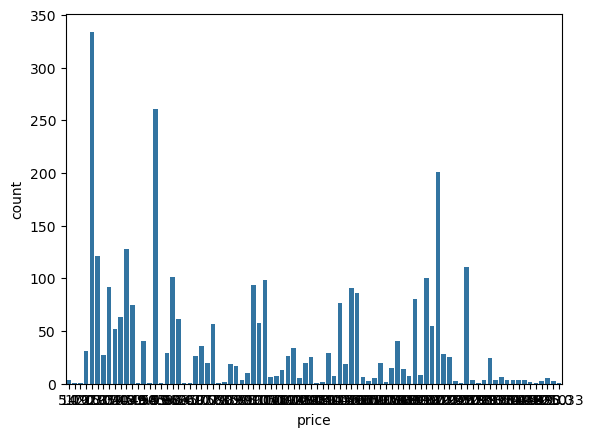

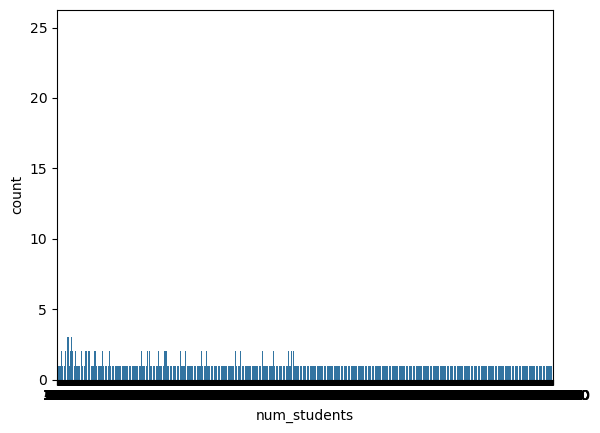

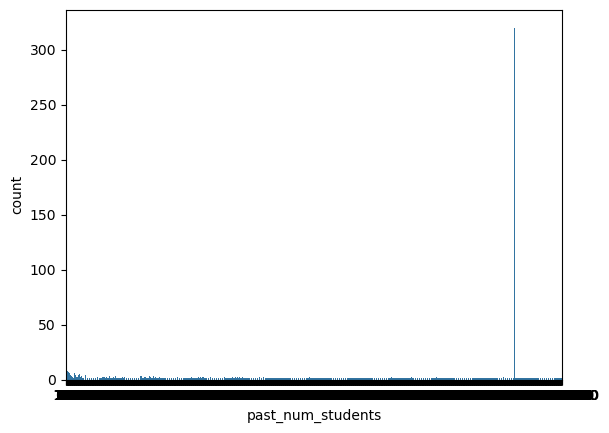

In [21]:
for columns in numerical_df:
    sns.countplot(x=numerical_df[columns], data=numerical_df)
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

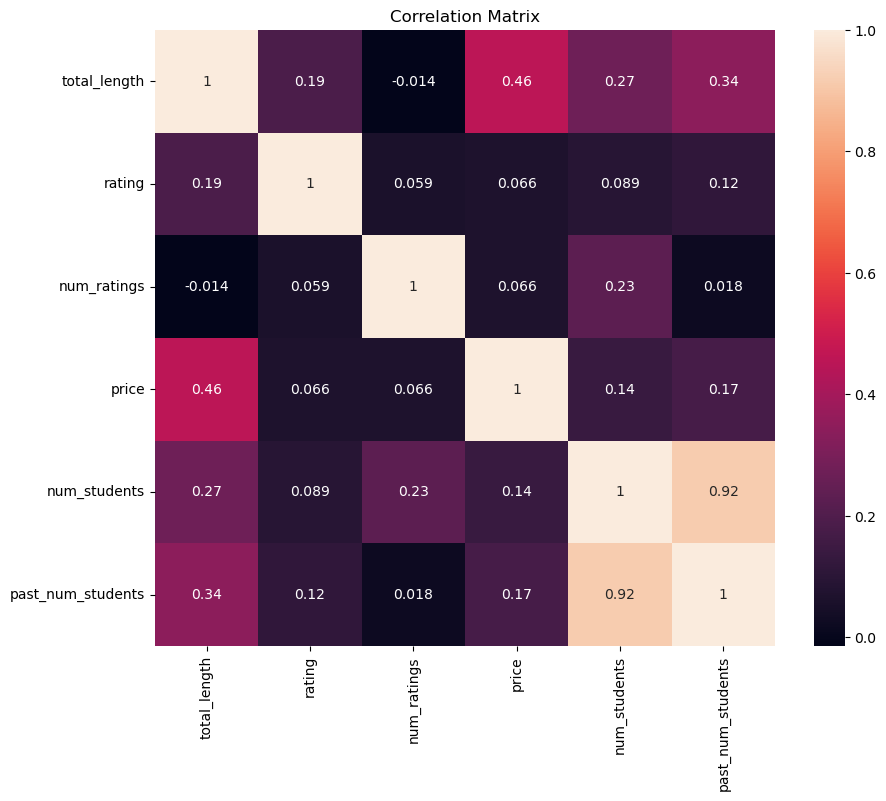

In [22]:
corr_matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show
plt.title('Correlation Matrix')

#### I expected it but there is a high correlation between past number of students and actual number of students (target of this model) since the latter is calculated by adding up new students to the already signed up students. We can already tell that this variable will be the one with the most impact on the predictions.

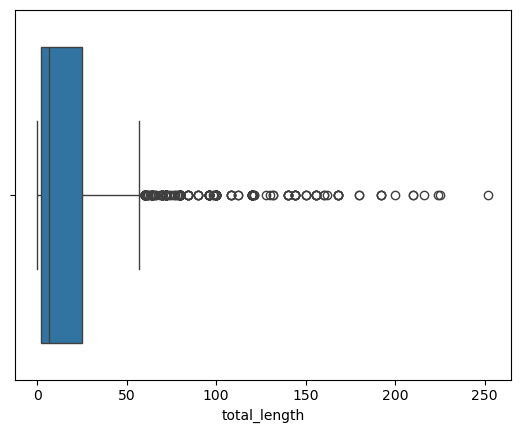

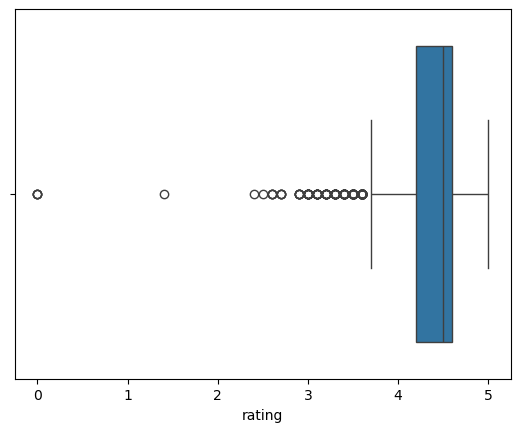

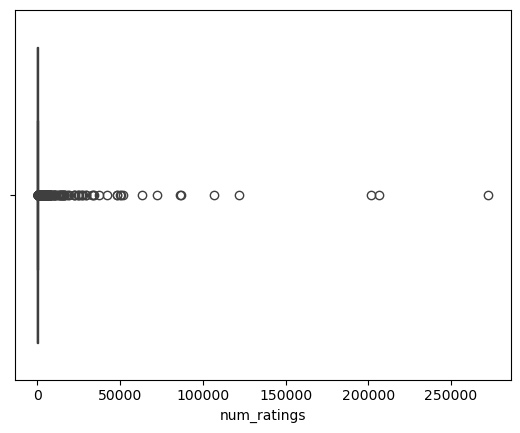

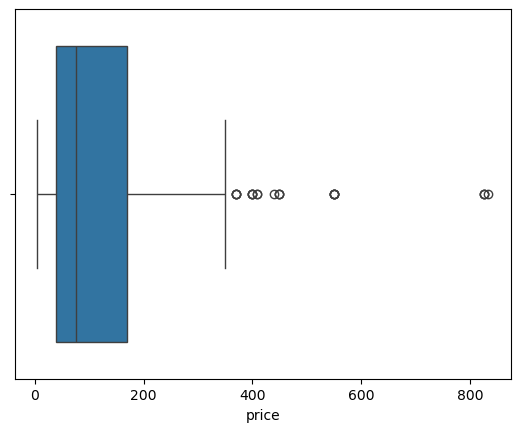

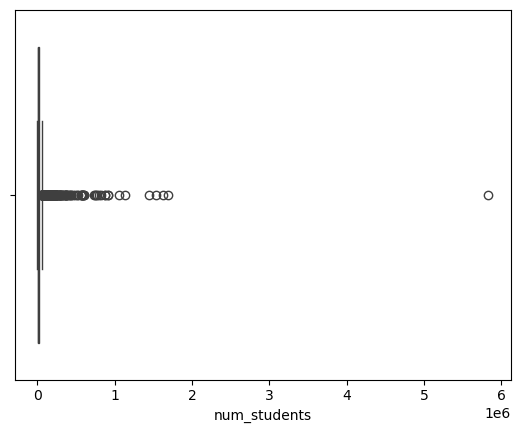

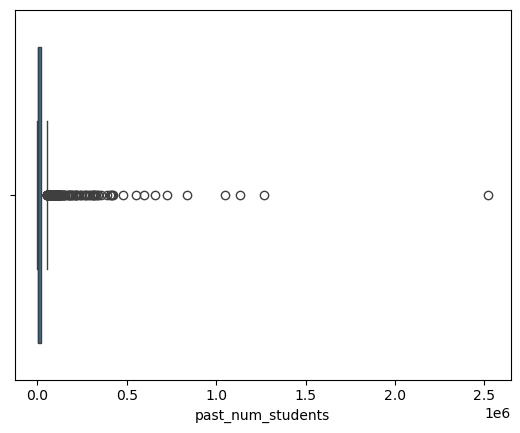

In [23]:
for columns in numerical_df:
    sns.boxplot(x=numerical_df[columns])
    plt.show()

#### there seems to be a few outliers that could be eliminated so I'll look at them and drop them from the original dataset if it makes sense

In [24]:
data[data['past_num_students']>2000000]

,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
724,Development,Beginner Level,216.0,4.506679,21.236641,142.284811,5829981.0,2522780.0,edX


In [25]:
data[data['price']>750]

,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
36,Development,Expert Level,40.0,4.506679,21.236641,833.33,5776.0,51943.173364,edX
371,Business,Expert Level,192.0,2.600000,6.000000,825.00,54675.0,33850.000000,edX
1299,Development,Expert Level,160.0,4.600000,5.000000,825.00,82017.0,63150.000000,edX
2338,Development,Expert Level,150.0,3.400000,5.000000,825.00,57326.0,44354.000000,edX


In [26]:
data[data['num_ratings']>150000]

,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
647,Development,All Levels,17.5,4.7,206584.0,195.0,912171.0,27801.0,Udemy
2237,Development,All Levels,22.0,4.6,201703.0,190.0,759382.0,73783.0,Udemy
2730,Development,All Levels,43.0,4.7,272529.0,200.0,910614.0,121584.0,Udemy


In [27]:
data[data['rating']<2]

,subject,level,total_length,rating,num_ratings,price,num_students,past_num_students,online_academy
558,Design,All Levels,0.600000,0.0,0.000000,20.0,0.000000,0.0,Udemy
640,Finance & Accounting,All Levels,0.616667,0.0,0.000000,20.0,0.000000,0.0,Udemy
2022,Development,All Levels,4.500000,1.4,94.000000,180.0,616.000000,613.0,Udemy
2222,Finance & Accounting,All Levels,0.616667,0.0,0.000000,20.0,0.000000,0.0,Udemy
3109,Music,Beginner Level,1.000000,0.0,1728.286554,20.0,12469.926316,3.0,Udemy


#### looking back at the urls, while those values seem extreme they are actually true so I've decided to keep them

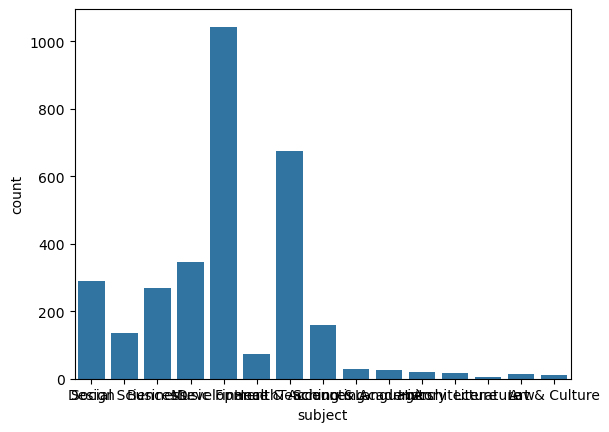

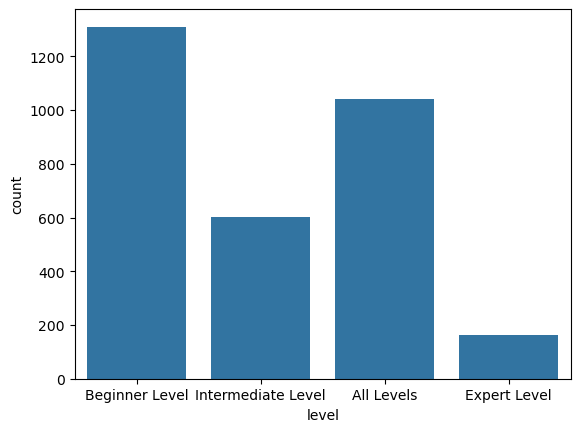

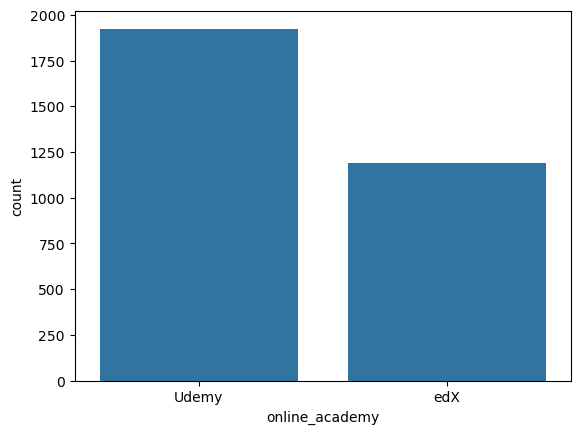

In [28]:
for columns in categorical_df:
    sns.countplot(x=categorical_df[columns], data=categorical_df)
    plt.show()

#### Hypothesis testing for independent variables between categorical features:

In [29]:
import scipy.stats as st

#alpha=0.05
#H0: variables are independent
#H1: variables are not independent

data_crosstab = pd.crosstab(categorical_df['subject'], categorical_df['level'], margins=False)
st.chi2_contingency(data_crosstab)[1]
    #p-value<0.05, we reject H0, there seems to be a link between subject and level 
    # we can assume that some subjects offer more specific level of courses compare to others

9.388267425421028e-126

In [30]:
#repeating the test for level and online_academy
data_crosstab = pd.crosstab(categorical_df['level'], categorical_df['online_academy'], margins=False)
print(st.chi2_contingency(data_crosstab)[1])
    #p-value<0.05, we reject H0, there seems to be a link between level and online_academy 
    # we can assume that a specific online academy will offer more courses of a certain level compare to others
    
#repeating for subject and online_academy
data_crosstab = pd.crosstab(categorical_df['subject'], categorical_df['online_academy'], margins=False)
st.chi2_contingency(data_crosstab)[1]
    #p-value<0.05, we reject H0, there seems to be a link between subject and online_academy 
    # we can assume that a specific online academy will offer more courses of a certain level compare to others
    # for example: udemy is more axed towards finance than edX

1.4911468591333128e-221


0.0

# Pre-processing

In [31]:
# separating the data using a train-test-split
y = data['num_students']
X = data.drop(['num_students'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# and resetting the index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [32]:
def split_num_cat(df):
    df_num = df.select_dtypes(include=np.number)
    df_cat = df.select_dtypes(include=object)
    return df_num, df_cat

X_train_num, X_train_cat = split_num_cat(X_train)
X_test_num, X_test_cat = split_num_cat(X_test)

#### Scaling

In [33]:
X_train_num.describe().T
    #quite a huge difference in value range between variables so scaling is necessary

,count,mean,std,min,25%,50%,75%,max
total_length,2492.0,18.438323,27.022861,0.133333,2.000000,6.0,25.00,225.00
rating,2492.0,4.335538,0.421322,0.000000,4.100000,4.5,4.60,5.00
num_ratings,2492.0,1117.748419,9516.231655,0.000000,21.236641,35.0,213.00,272529.00
price,2492.0,104.723836,81.674310,5.000000,40.000000,75.0,166.00,833.33
past_num_students,2492.0,21822.035396,77633.498993,0.000000,593.500000,3263.0,21722.25,2522780.00


In [34]:
# Scaling/Normalizing the data

transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
display(X_train_scaled.describe().T)
    #data has been successfully scaled between 0 and 1

#applying the transformer to our test set
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
total_length,2492.0,0.081404,0.120173,0.0,0.008301,0.026090,0.110584,1.0
rating,2492.0,0.867108,0.084264,0.0,0.820000,0.900000,0.920000,1.0
num_ratings,2492.0,0.004101,0.034918,0.0,0.000078,0.000128,0.000782,1.0
price,2492.0,0.120391,0.098601,0.0,0.042254,0.084507,0.194367,1.0
past_num_students,2492.0,0.008650,0.030773,0.0,0.000235,0.001293,0.008610,1.0


,count,mean,std,min,25%,50%,75%,max
total_length,624.0,0.092803,0.140692,0.001482,0.009969,0.034984,0.123925,1.120071
rating,624.0,0.865347,0.086962,0.000000,0.840000,0.900000,0.901336,1.000000
num_ratings,624.0,0.003333,0.016494,0.000007,0.000078,0.000134,0.000694,0.231260
price,624.0,0.123597,0.103633,0.000000,0.042254,0.087526,0.205232,0.989944
past_num_students,624.0,0.008567,0.021679,0.000000,0.000310,0.002106,0.009387,0.332670


#### Encoding

In [35]:
# Encoding our data with OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_encoded = pd.DataFrame(encoded_cat, columns=cols)
display(X_train_encoded)

#applying encoder on our test set:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
X_test_encoded = pd.DataFrame(encoded_test_cat, columns=cols)
X_test_encoded

,subject_Art & Culture,subject_Business,subject_Design,subject_Development,subject_Finance & Accounting,subject_Health,subject_History,subject_Language,subject_Law,subject_Literature,subject_Music,subject_Sciences,subject_Social Sciences,subject_Teaching & Academics,level_Beginner Level,level_Expert Level,level_Intermediate Level,online_academy_edX
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2488,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2490,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,subject_Art & Culture,subject_Business,subject_Design,subject_Development,subject_Finance & Accounting,subject_Health,subject_History,subject_Language,subject_Law,subject_Literature,subject_Music,subject_Sciences,subject_Social Sciences,subject_Teaching & Academics,level_Beginner Level,level_Expert Level,level_Intermediate Level,online_academy_edX
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Concatenating processed data

In [36]:
# Concatenating our numerical and categorical data:

X_train_treated = pd.concat([X_train_scaled, X_train_encoded], axis=1)
display(X_train_treated)
X_test_treated = pd.concat([X_test_scaled, X_test_encoded], axis=1)


,total_length,rating,num_ratings,price,past_num_students,subject_Art & Culture,subject_Business,subject_Design,subject_Development,subject_Finance & Accounting,subject_Health,subject_History,subject_Language,subject_Law,subject_Literature,subject_Music,subject_Sciences,subject_Social Sciences,subject_Teaching & Academics,level_Beginner Level,level_Expert Level,level_Intermediate Level,online_academy_edX
0,0.092796,0.901336,0.000078,0.294569,0.020590,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.002594,0.960000,0.000055,0.018109,0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.479692,0.901336,0.000078,0.205232,0.020590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.199526,0.901336,0.000078,0.173844,0.027672,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.026090,0.820000,0.000268,0.108652,0.000484,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,0.010525,0.860000,0.000360,0.018109,0.000026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2488,0.034984,0.901336,0.000078,0.113481,0.002250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2489,0.030537,0.920000,0.000084,0.054326,0.000031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2490,0.012748,0.880000,0.000007,0.175051,0.000017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building a regression model

In [37]:
# setting a function to train and score different models

def train_test_model(list):
    for values in list:
        m=values
        m.fit(X_train_treated, y_train)
        pred_train = m.predict(X_train_treated)
        score_train = r2_score(y_train, pred_train)
        pred_test = m.predict(X_test_treated)
        score_test = r2_score(y_test, pred_test)
        mae = round(mean_absolute_error(y_test, pred_test),2)
        print(values)
        print(f"train score is: {score_train}, test score is: {score_test} and mean absolute error is {mae}")
    return

In [38]:
models=[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), MLPRegressor()]
train_test_model(models)

LinearRegression()
train score is: 0.9122928938384797, test score is: 0.7435354362855942 and mean absolute error is 19770.31
KNeighborsRegressor()
train score is: 0.5571924726864235, test score is: 0.569937337318642 and mean absolute error is 22113.71
DecisionTreeRegressor()
train score is: 0.9999848981932179, test score is: 0.7012938483460396 and mean absolute error is 12867.8
MLPRegressor()
train score is: -0.03566056095069037, test score is: -0.09318260983537163 and mean absolute error is 30954.07


C:\Users\nolwe\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Seems like LinearRegression() has the best accuracy and DecisionTreeRegressor() has the best mean absolute error. Since the score are quite similar between the 2 models, I'll choose to prioritize the one with the lowest mae so DecisionTreeRegressor.

In [51]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

random_grid = {'max_depth': [3,4,5,6,7,8,9,10,None],
               'criterion': ['squared_error','absolute_error'],
               'min_samples_split': [2,3,4,5,6,7,8,9,10],
               'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
               'max_features': [3,4,5,6,None]}

model = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=100, cv = 5, n_jobs=-1)

In [52]:
%%time
random_search.fit(X_train_treated,y_train)

CPU times: total: 938 ms
Wall time: 6.27 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      None],
                                        'max_features': [3, 4, 5, 6, None],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]})

In [53]:
random_search.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 8,
 'criterion': 'absolute_error'}

In [54]:
random_search.best_score_

0.7512411408733488

## Building the model

In [55]:
#I'll now build the model using the best performing parameters found during random_search
reg = DecisionTreeRegressor(random_state=42, min_samples_split=7, min_samples_leaf=3, max_depth=8, criterion='absolute_error')
reg_model = reg.fit(X_train_treated, y_train)

pred_train = reg_model.predict(X_train_treated)
score_train = r2_score(y_train, pred_train)

pred_test = reg_model.predict(X_test_treated)
score_test = r2_score(y_test, pred_test)

mae = round(mean_absolute_error(y_test, pred_test),2)

print(f"train score is: {score_train}, test score is: {score_test} and mean absolute error is {mae}")

train score is: 0.6590702499679066, test score is: 0.6866302975194024 and mean absolute error is 12119.01


# Saving scaler, encoder and model in pkl files to reuse later

In [56]:
import pickle

pickle.dump(transformer, open('scaling_model.pkl','wb'))
pickle.dump(encoder, open('encoding_model.pkl','wb'))
pickle.dump(reg_model, open('regression_model.pkl','wb'))


In [57]:
# Loading models for verification
scale = pickle.load(open('scaling_model.pkl','rb'))
encode = pickle.load(open('encoding_model.pkl','rb'))
model = pickle.load(open('regression_model.pkl','rb'))

display(scale)
display(encode)
display(model)

MinMaxScaler()

OneHotEncoder(drop='first')

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=3, min_samples_split=7, random_state=42)